In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"povbyenn","key":"90a2d8d6c571efb78140bf9bdf40dde5"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d abhishek14398/heart-disease-classification

Dataset URL: https://www.kaggle.com/datasets/abhishek14398/heart-disease-classification
License(s): CC0-1.0
  0% 0.00/3.45k [00:00<?, ?B/s]
100% 3.45k/3.45k [00:00<00:00, 8.15MB/s]


In [4]:
!mkdir heart-disease-classification
!unzip heart-disease-classification.zip -d heart-disease-classification
!ls heart-disease-classification

Archive:  heart-disease-classification.zip
  inflating: heart-disease-classification/heart.csv  
heart.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn import metrics
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [6]:
df = pd.read_csv('heart-disease-classification/heart.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.shape

(303, 14)

In [9]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
overall_duplicates = df[df.duplicated()]
print("Duplikat Keseluruhan:")
print(overall_duplicates)

Duplikat Keseluruhan:
     age  sex  chest_pain_type  resting_bp  cholestoral  fasting_blood_sugar  \
164   38    1                2         138          175                    0   

     restecg  max_hr  exang  oldpeak  slope  num_major_vessels  thal  target  
164        1     173      0      0.0      2                  4     2       1  


In [11]:
df = df.reset_index(drop=True)

In [12]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [13]:
ind_col = [col for col in df.columns if col != 'target']
dep_col = 'target'

In [14]:
x = df[ind_col] #features
y = df[dep_col] #label

In [15]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', x_train.shape)
print('test shape:', x_test.shape)

train shape: (212, 13)
test shape: (91, 13)


In [18]:
model = Sequential()

model.add(Dense(8, activation='relu', input_dim=x.shape[-1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

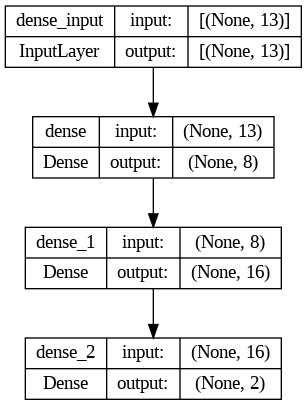

In [19]:
plot_model(model, show_shapes = True)

In [20]:
optim = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

batch_size=1
epochs = 100

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Epoch 1/100
190/190 [==============================] - 1s 3ms/step - loss: 0.7227 - acc: 0.5895 - val_loss: 0.4892 - val_acc: 0.8182
Epoch 2/100
190/190 [==============================] - 0s 2ms/step - loss: 0.6415 - acc: 0.6316 - val_loss: 0.7874 - val_acc: 0.5000
Epoch 3/100
190/190 [==============================] - 0s 2ms/step - loss: 0.6402 - acc: 0.6263 - val_loss: 0.6013 - val_acc: 0.7273
Epoch 4/100
190/190 [==============================] - 0s 2ms/step - loss: 0.6070 - acc: 0.6526 - val_loss: 0.4871 - val_acc: 0.7727
Epoch 5/100
190/190 [==============================] - 0s 2ms/step - loss: 0.5949 - acc: 0.7053 - val_loss: 0.4780 - val_acc: 0.8182
Epoch 6/100
190/190 [==============================] - 0s 2ms/step - loss: 0.5375 - acc: 0.7158 - val_loss: 0.9613 - val_acc: 0.5000
Epoch 7/100
190/190 [==============================] - 0s 2ms/step - loss: 0.5649 - acc: 0.7211 - val_loss: 0.5882 - val_acc: 0.7273
Epoch 8/100
190/190 [==============================] - 0s 2ms/step - 

In [21]:
from sklearn.metrics import accuracy_score
pred = np.argmax(model.predict(x_test), axis=1)
print(accuracy_score(y_test, pred))

3/3 [==============================] - 0s 3ms/step
0.7252747252747253


In [22]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.4952 - acc: 0.7253


[0.49523279070854187, 0.7252747416496277]

In [23]:
prediction = model.predict([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1]])
print(prediction)

1/1 [==============================] - 0s 72ms/step
[[0.13390179 0.8660982 ]]


In [24]:
df.sample()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1


In [25]:
prediction = model.predict([[55,	1,	0,	132,	353,	0,	1,	132,	1,	1.2,	1,	1,	3	]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 1:
  print("Disease")
else:
  print("No Disease")

1/1 [==============================] - 0s 37ms/step
No Disease


In [26]:
prediction = model.predict([[37,	1,	2,	130,	250,	0,	1,	187,	0,	3.5,	0,	0,	2	]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 1:
  print("Disease")
else:
  print("No Disease")

1/1 [==============================] - 0s 35ms/step
Disease


In [27]:
model.save('./disease.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
model = tf.keras.models.load_model('./disease.h5')
converter =tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./disease.tflite", "wb").write(tflite_model)

3256